## video to img

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
from sklearn.model_selection import train_test_split

In [2]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten, Embedding, Conv2D, MaxPooling2D, Input, AveragePooling2D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings(action='ignore') 

In [5]:
# import cv2
# cap = cv2.VideoCapture('./datasets/coca_cola.mp4') #동영상 불러오기
# num = 0
# while(cap.isOpened()):
#     ret, frame = cap.read()
#     if not ret:
#         break
#     frame = cv2.flip(frame, -1)
#     if ret:
#         cv2.imshow('frame', frame)
#         #이미지의 각 이름을 자동으로 지정
#         path = './coca_cola_250_' + str(num) + '.jpg'
#         cv2.imwrite(path, frame) #영상 -> 이미지로 저장
#         key = cv2.waitKey(25)
#         if key == 27: # Esc
#             break
#     num += 1
# cap.release()
# cv2.destroyAllWindows()

In [6]:
# import cv2
# video = cv2.VideoCapture('./datasets/coca_cola.mp4')
# width = video.get(cv2.CAP_PROP_FRAME_WIDTH)
# height = video.get(cv2.CAP_PROP_FRAME_HEIGHT)
# count = video.get(cv2.CAP_PROP_FRAME_COUNT)
# fps = video.get(cv2.CAP_PROP_FPS)
# print('가로: ', str(width))
# print('세로: ', str(height))
# print('총 프레임수: ', str(count))
# print('FPS: ' + str(fps))

가로:  720.0
세로:  1280.0
총 프레임수:  797.0
FPS: 29.977432296890672


## rename images

In [137]:
# # 사진 이름 한번에 바꾸기(주의! 순서가 랜덤으로 들어온다)

# import os

# file_path = './datasets/Coke' # 바꿔야하는 이미지가 들어있는 파일
# file_names = os.listdir(file_path)

# num = 1
# for name in file_names:
#     src = os.path.join(file_path, name)
#     dst = 'coca_cola_250_' + str(num) + '.jpg' # 바꿀 이름
#     dst = os.path.join(file_path, dst)
#     os.rename(src, dst)
#     num += 1

## load img

In [3]:
path = 'C:/Users/Project/datasets/no_object' # folder path
os.chdir(path) # move to the folder
files = os.listdir(path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
no_object_imgs = []
for file in files:
    if '.jpg' in file: 
        src = cv2.imread(file)
        f = cv2.resize(src , (224, 224)) # resize img
        no_object_imgs.append(f)
np.array(no_object_imgs).shape

(2031, 224, 224, 3)

In [4]:
img_list = ['coca_cola_250', 'coca_cola_350', 'pepsi_250', 'pepsi_355', 'pepsi_zero_355', 'pepsi_zero_500','pocari_240', 
            'pocari_620', 'coca_cola_zero_250', 'coca_cola_zero_355', 'chilsung250', 'chilsung355', 'sprite_250', 'sprite_355', ]

In [5]:
for i in range(len(img_list)):
    path = f'C:/Users/Project/datasets/{img_list[i]}' # folder path
    os.chdir(path) # move to the folder
    files = os.listdir(path) # 해당 폴더에 있는 파일 이름을 리스트 형태로 받음
    globals()[f'{img_list[i]}_imgs'] = []
    for file in files:
        if '.jpg' in file: 
            src = cv2.imread(file)
            f = cv2.resize(src , (224, 224)) # resize img
            globals()[f'{img_list[i]}_imgs'].append(f)
    print(img_list[i], np.array(globals()[f'{img_list[i]}_imgs']).shape)

coca_cola_250 (488, 224, 224, 3)
coca_cola_350 (701, 224, 224, 3)
pepsi_250 (1601, 224, 224, 3)
pepsi_355 (921, 224, 224, 3)
pepsi_zero_355 (1668, 224, 224, 3)
pepsi_zero_500 (486, 224, 224, 3)
pocari_240 (1500, 224, 224, 3)
pocari_620 (1507, 224, 224, 3)
coca_cola_zero_250 (552, 224, 224, 3)
coca_cola_zero_355 (769, 224, 224, 3)
chilsung250 (600, 224, 224, 3)
chilsung355 (600, 224, 224, 3)
sprite_250 (1055, 224, 224, 3)
sprite_355 (855, 224, 224, 3)


## XML to CSV

In [6]:
# XML to CSV
import os
import glob
import pandas as pd
import io
import xml.etree.ElementTree as ET
import argparse
def xml_to_csv(path):
  xml_list = []
  for xml_file in glob.glob(path + '/*.xml'):
      tree = ET.parse(xml_file)
      root = tree.getroot()
      filename = root.find('filename').text
      width = int(root.find('size').find('width').text)
      height = int(root.find('size').find('height').text)
      for member in root.findall('object'):
          bndbox = member.find('bndbox')
          value = (filename,
                    width,
                    height,
                    member.find('name').text,
                    int(bndbox.find('xmin').text),
                    int(bndbox.find('ymin').text),
                    int(bndbox.find('xmax').text),
                    int(bndbox.find('ymax').text),
                    )
          xml_list.append(value)
  column_name = ['filename', 'width', 'height',
                  'class', 'xmin', 'ymin', 'xmax', 'ymax']
  xml_df = pd.DataFrame(xml_list, columns=column_name)
  return xml_df

In [7]:
for i in range(len(img_list)):
    path = f'C:/Users/Project/datasets/{img_list[i]}' # folder path
    globals()[f'{img_list[i]}_info'] = xml_to_csv(path)
    print(img_list[i], globals()[f'{img_list[i]}_info'].shape)

coca_cola_250 (488, 8)
coca_cola_350 (701, 8)
pepsi_250 (1601, 8)
pepsi_355 (921, 8)
pepsi_zero_355 (1668, 8)
pepsi_zero_500 (486, 8)
pocari_240 (1500, 8)
pocari_620 (1507, 8)
coca_cola_zero_250 (552, 8)
coca_cola_zero_355 (769, 8)
chilsung250 (600, 8)
chilsung355 (600, 8)
sprite_250 (1055, 8)
sprite_355 (855, 8)


## Preprocessing

In [19]:
for i in range(len(img_list)):
    globals()[f'{img_list[i]}_info_df'] = globals()[f'{img_list[i]}_info'].copy()
    globals()[f'{img_list[i]}_info_df']['class'] = i+1

In [20]:
info_df = pd.concat([globals()[f'{img_list[i]}_info_df'][:486] for i in range(len(img_list))])
info_df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,coca_cola_250_1.jpg,3024,4032,1,1197,1278,2282,3678
1,coca_cola_250_10.jpg,3024,4032,1,632,83,2427,3628
2,coca_cola_250_100.jpg,3024,4032,1,507,348,2367,3683
3,coca_cola_250_101.jpg,3024,4032,1,7,718,1977,4008
4,coca_cola_250_102.jpg,3024,4032,1,152,893,2277,4032
...,...,...,...,...,...,...,...,...
481,sprite355_533.jpg,720,960,14,117,251,460,814
482,sprite355_534.jpg,720,960,14,114,248,465,810
483,sprite355_535.jpg,720,960,14,110,250,468,821
484,sprite355_536.jpg,720,960,14,118,258,468,825


In [21]:
info_df['xmin'] = round(info_df['xmin'] / (info_df['width']/224))
info_df['xmax'] = round(info_df['xmax'] / (info_df['width']/224))
info_df['ymin'] = round(info_df['ymin'] / (info_df['height']/224))
info_df['ymax'] = round(info_df['ymax'] / (info_df['height']/224))
info_df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,coca_cola_250_1.jpg,3024,4032,1,89.0,71.0,169.0,204.0
1,coca_cola_250_10.jpg,3024,4032,1,47.0,5.0,180.0,202.0
2,coca_cola_250_100.jpg,3024,4032,1,38.0,19.0,175.0,205.0
3,coca_cola_250_101.jpg,3024,4032,1,1.0,40.0,146.0,223.0
4,coca_cola_250_102.jpg,3024,4032,1,11.0,50.0,169.0,224.0
...,...,...,...,...,...,...,...,...
481,sprite355_533.jpg,720,960,14,36.0,59.0,143.0,190.0
482,sprite355_534.jpg,720,960,14,35.0,58.0,145.0,189.0
483,sprite355_535.jpg,720,960,14,34.0,58.0,146.0,192.0
484,sprite355_536.jpg,720,960,14,37.0,60.0,146.0,192.0


In [22]:
info_df['class'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [23]:
info_df

info_df['rec_width'] = info_df['xmax'] - info_df['xmin']
info_df['rec_height'] = info_df['ymax'] - info_df['ymin']
info_df['x'] = round((info_df.xmin + info_df.xmax)/2)  #바인딩 박스 중심 x점
info_df['y'] = round((info_df.ymin + info_df.ymax)/2)  #바인딩 박스 중심 y점
info_df['object'] = 1  #객체 유무(0:없음, 1:있음)
info_df

,filename,width,height,class,xmin,ymin,xmax,ymax,rec_width,rec_height,x,y,object
0,coca_cola_250_1.jpg,3024,4032,1,89.0,71.0,169.0,204.0,80.0,133.0,129.0,138.0,1
1,coca_cola_250_10.jpg,3024,4032,1,47.0,5.0,180.0,202.0,133.0,197.0,114.0,104.0,1
2,coca_cola_250_100.jpg,3024,4032,1,38.0,19.0,175.0,205.0,137.0,186.0,106.0,112.0,1
3,coca_cola_250_101.jpg,3024,4032,1,1.0,40.0,146.0,223.0,145.0,183.0,74.0,132.0,1
4,coca_cola_250_102.jpg,3024,4032,1,11.0,50.0,169.0,224.0,158.0,174.0,90.0,137.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,sprite355_533.jpg,720,960,14,36.0,59.0,143.0,190.0,107.0,131.0,90.0,124.0,1
482,sprite355_534.jpg,720,960,14,35.0,58.0,145.0,189.0,110.0,131.0,90.0,124.0,1
483,sprite355_535.jpg,720,960,14,34.0,58.0,146.0,192.0,112.0,134.0,90.0,125.0,1
484,sprite355_536.jpg,720,960,14,37.0,60.0,146.0,192.0,109.0,132.0,92.0,126.0,1


In [24]:
object_info_df = pd.DataFrame(np.zeros((len(no_object_imgs), 13)))
object_info_df.columns = ['filename','width', 'height', 'class','xmin', 'ymin', 'xmax', 'ymax', 
                          'rec_width', 'rec_height', 'x', 'y', 'object']
object_info_df

,filename,width,height,class,xmin,ymin,xmax,ymax,rec_width,rec_height,x,y,object
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
X = []
for i in range(len(img_list)):
    X += globals()[f'{img_list[i]}_imgs'][:486]
np.array(X).shape

(6804, 224, 224, 3)

In [26]:
total_info_df = pd.concat([info_df, object_info_df])

In [27]:
total_X = X + no_object_imgs
total_X  = np.array(total_X)
total_X.shape

(8835, 224, 224, 3)

In [28]:
total_X.shape

(8835, 224, 224, 3)

In [29]:
total_info_df.index = [i for i in range(total_info_df.shape[0])]
total_info_df

,filename,width,height,class,xmin,ymin,xmax,ymax,rec_width,rec_height,x,y,object
0,coca_cola_250_1.jpg,3024.0,4032.0,1.0,89.0,71.0,169.0,204.0,80.0,133.0,129.0,138.0,1.0
1,coca_cola_250_10.jpg,3024.0,4032.0,1.0,47.0,5.0,180.0,202.0,133.0,197.0,114.0,104.0,1.0
2,coca_cola_250_100.jpg,3024.0,4032.0,1.0,38.0,19.0,175.0,205.0,137.0,186.0,106.0,112.0,1.0
3,coca_cola_250_101.jpg,3024.0,4032.0,1.0,1.0,40.0,146.0,223.0,145.0,183.0,74.0,132.0,1.0
4,coca_cola_250_102.jpg,3024.0,4032.0,1.0,11.0,50.0,169.0,224.0,158.0,174.0,90.0,137.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train, Test split

In [30]:
Y = total_info_df[['class', 'rec_width', 'rec_height', 'x', 'y', 'object']]
Y

,class,rec_width,rec_height,x,y,object
0,1.0,80.0,133.0,129.0,138.0,1.0
1,1.0,133.0,197.0,114.0,104.0,1.0
2,1.0,137.0,186.0,106.0,112.0,1.0
3,1.0,145.0,183.0,74.0,132.0,1.0
4,1.0,158.0,174.0,90.0,137.0,1.0
...,...,...,...,...,...,...
8830,0.0,0.0,0.0,0.0,0.0,0.0
8831,0.0,0.0,0.0,0.0,0.0,0.0
8832,0.0,0.0,0.0,0.0,0.0,0.0
8833,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
x_train, x_test, y_train, y_test = train_test_split(np.array(total_X), np.array(Y),
                                                    test_size=0.2, shuffle=True, stratify=Y['class'], random_state=34)

In [32]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7068, 224, 224, 3) (1767, 224, 224, 3) (7068, 6) (1767, 6)


In [33]:
y_train

array([[  3., 177.,  83.,  88., 110.,   1.],
       [  0.,   0.,   0.,   0.,   0.,   0.],
       [  8., 103., 127., 112., 144.,   1.],
       ...,
       [  3., 186.,  71., 119., 108.,   1.],
       [  0.,   0.,   0.,   0.,   0.,   0.],
       [  6., 129., 205., 106., 122.,   1.]])

In [34]:
# y1_train, y1_test = y_train[['rec_width', 'rec_height', 'x', 'y']] , y_test[['rec_width', 'rec_height', 'x', 'y']]
# y2_train, y2_test = y_train[['class']], y_test[['class']]
# y3_train, y3_test = y_train[['object']], y_test[['object']]

In [35]:
x_trn = x_train/255
x_ts = x_test/255

In [36]:
print(x_trn.shape, x_ts.shape)
#print(y1_train.shape, y2_train.shape, y3_train.shape)

(7068, 224, 224, 3) (1767, 224, 224, 3)


## Modeling

In [37]:
inputs = Input(shape=(224, 224, 3))
x = Conv2D(filters=6, kernel_size=5, strides=2, padding='same', activation='relu')(inputs)
x = MaxPooling2D(3, 3)(x)

x1 = Conv2D(filters=60, kernel_size=1, strides=1, padding='same', activation='relu')(x)                      
x2 = Conv2D(filters=15, kernel_size=1, strides=1, padding='same', activation='relu')(x)
x2 = Conv2D(filters=30, kernel_size=3, strides=1, padding='same', activation='relu')(x2)
x3 = Conv2D(filters=15, kernel_size=1, strides=1, padding='same', activation='relu')(x)
x3 = Conv2D(filters=30, kernel_size=5, strides=1, padding='same', activation='relu')(x3)
x4 = MaxPooling2D(pool_size=(3, 3), strides=1, padding='same')(x)  
x4 = Conv2D(filters=60, kernel_size=1, strides=1, padding='same', activation='relu')(x4)

In [38]:
outputs = tf.concat([x1, x2, x3, x4], axis=3)    
outputs = Flatten()(outputs)
outputs = Dense(6, activation= 'linear')(outputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss=['mse'], metrics=['mse'], optimizer='adam')

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 6)  456         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 37, 37, 6)    0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_2 (Conv2D)              (None, 37, 37, 15)   105         ['max_pooling2d[0][0]']      

In [39]:
history = model.fit(x_trn, y_train,
                     epochs=10, batch_size=1)

Epoch 1/10
7068/7068 [==============================] - 166s 23ms/step - loss: 461.9215 - mse: 461.9215
Epoch 2/10
7068/7068 [==============================] - 158s 22ms/step - loss: 155.2142 - mse: 155.2142
Epoch 3/10
7068/7068 [==============================] - 162s 23ms/step - loss: 100.5258 - mse: 100.5258
Epoch 4/10
7068/7068 [==============================] - 160s 23ms/step - loss: 78.4738 - mse: 78.4738
Epoch 5/10
7068/7068 [==============================] - 159s 22ms/step - loss: 61.3283 - mse: 61.3283
Epoch 6/10
7068/7068 [==============================] - 159s 23ms/step - loss: 52.0152 - mse: 52.0152
Epoch 7/10
7068/7068 [==============================] - 161s 23ms/step - loss: 43.2745 - mse: 43.2745
Epoch 8/10
7068/7068 [==============================] - 163s 23ms/step - loss: 37.9201 - mse: 37.9201
Epoch 9/10
7068/7068 [==============================] - 160s 23ms/step - loss: 34.7102 - mse: 34.7102
Epoch 10/10
7068/7068 [==============================] - 160s 23ms/step - lo

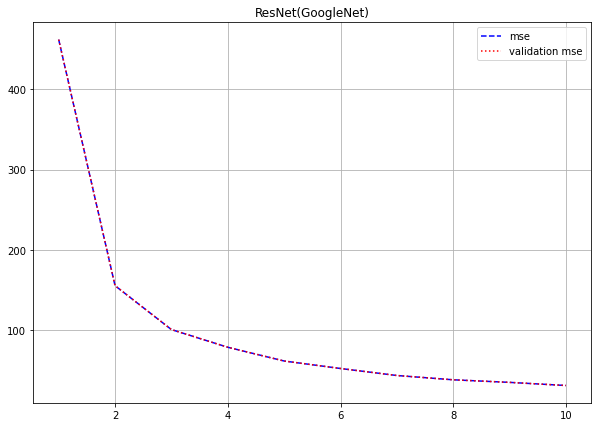

In [40]:
mse = history.history['mse']
val_mse = history.history['mse']

epochs = range(1, len(mse)+1)

plt.figure(figsize=(10, 7))
plt.title('ResNet(GoogleNet)')
plt.plot(epochs, mse, 'b--', label='mse')
plt.plot(epochs, val_mse, 'r:', label='validation mse')
plt.grid()
plt.legend()

plt.show()

In [41]:
pred = model.predict(x_ts)

56/56 [==============================] - 3s 50ms/step


In [42]:
y_test

array([[  0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.],
       [  9.,  93., 122., 112., 109.,   1.],
       ...,
       [  2., 199., 181., 118.,  90.,   1.],
       [  7., 109., 102., 126., 118.,   1.],
       [ 10., 135., 108., 100.,  91.,   1.]])

In [49]:
pd.DataFrame(pred).iloc[1699]

0      0.679212
1    214.212036
2     86.557251
3    111.128899
4    117.645035
5      1.607628
Name: 1699, dtype: float32

In [51]:
y_test[1699]

array([  4., 217.,  84., 108., 114.,   1.])

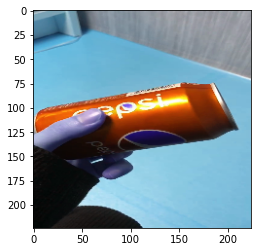

In [54]:
plt.imshow(x_test[1699])

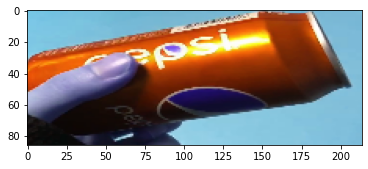

In [58]:
_, w, h, x, y, _= pred[1699]

plt.imshow(x_test[1699][int(y - h / 2):int(y + h/2), int(x - w / 2):int(x + w/2)])

In [328]:
total_info_df[total_info_df.]

,filename,width,height,class,xmin,ymin,xmax,ymax,rec_width,rec_height,x,y,object
0,coca_cola_250_1.jpg,3024.0,4032.0,1.0,89.0,71.0,169.0,204.0,80.0,133.0,129.0,138.0,1.0
1,coca_cola_250_10.jpg,3024.0,4032.0,1.0,47.0,5.0,180.0,202.0,133.0,197.0,114.0,104.0,1.0
2,coca_cola_250_100.jpg,3024.0,4032.0,1.0,38.0,19.0,175.0,205.0,137.0,186.0,106.0,112.0,1.0
3,coca_cola_250_101.jpg,3024.0,4032.0,1.0,1.0,40.0,146.0,223.0,145.0,183.0,74.0,132.0,1.0
4,coca_cola_250_102.jpg,3024.0,4032.0,1.0,11.0,50.0,169.0,224.0,158.0,174.0,90.0,137.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
